In [3]:
%matplotlib inline

import numpy as np
import glob
import os
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import norm 
import scipy as sc
import re
import scipy.optimize

from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt

sns.set_context("poster", font_scale=1.2)

In [4]:
dir = './'
    
print  (os.listdir( dir  ))
print(len(os.listdir(dir)))

['.ipynb_checkpoints', 'Analyse.ipynb', 'Sub1-male-age40-ver1.0-2019-11-24-14-18-19.csv', 'Sub2-male-age40-ver1.0-2019-11-25-16-43-37.csv']
4


In [5]:
a_main = pd.DataFrame()

filelist = os.listdir(dir)
for f in filelist:
    root, ext = os.path.splitext(f)
    if ext != '.csv':
        continue;
    
    print(f)
    
    main = pd.read_csv(f, delimiter=',', header=0, index_col =False)
    a_main = pd.concat([a_main, main], ignore_index=True)
            

Sub1-male-age40-ver1.0-2019-11-24-14-18-19.csv
Sub2-male-age40-ver1.0-2019-11-25-16-43-37.csv


In [6]:
print(a_main.columns)

Index(['SubId', 'ExpType', 'trialId', 'condition', 'response'], dtype='object')


In [11]:
def transconum(label):
    if (label == 1):
        return 'Control'
    else:
        return 'Target'
    
a_main['Condition'] = a_main['condition'].apply(transconum)

In [12]:
g_main = pd.DataFrame({'response' : a_main.groupby(['SubId', 'ExpType', 'condition'])['response'].mean()}).reset_index()


# Plot each subject data

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


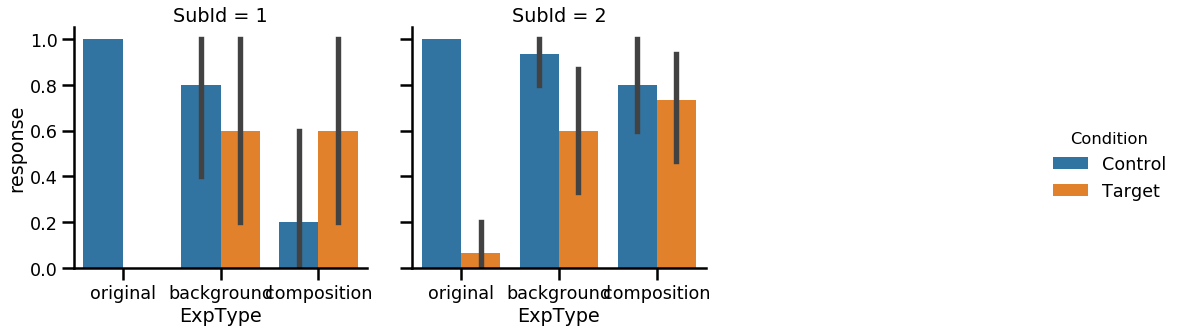

In [17]:
sns.set_context("poster", font_scale=0.8)
g = sns.factorplot(x='ExpType', y='response', data=a_main, hue='Condition', col='SubId', col_wrap=3, kind='bar')


## Plot all data

C:\Anaconda\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


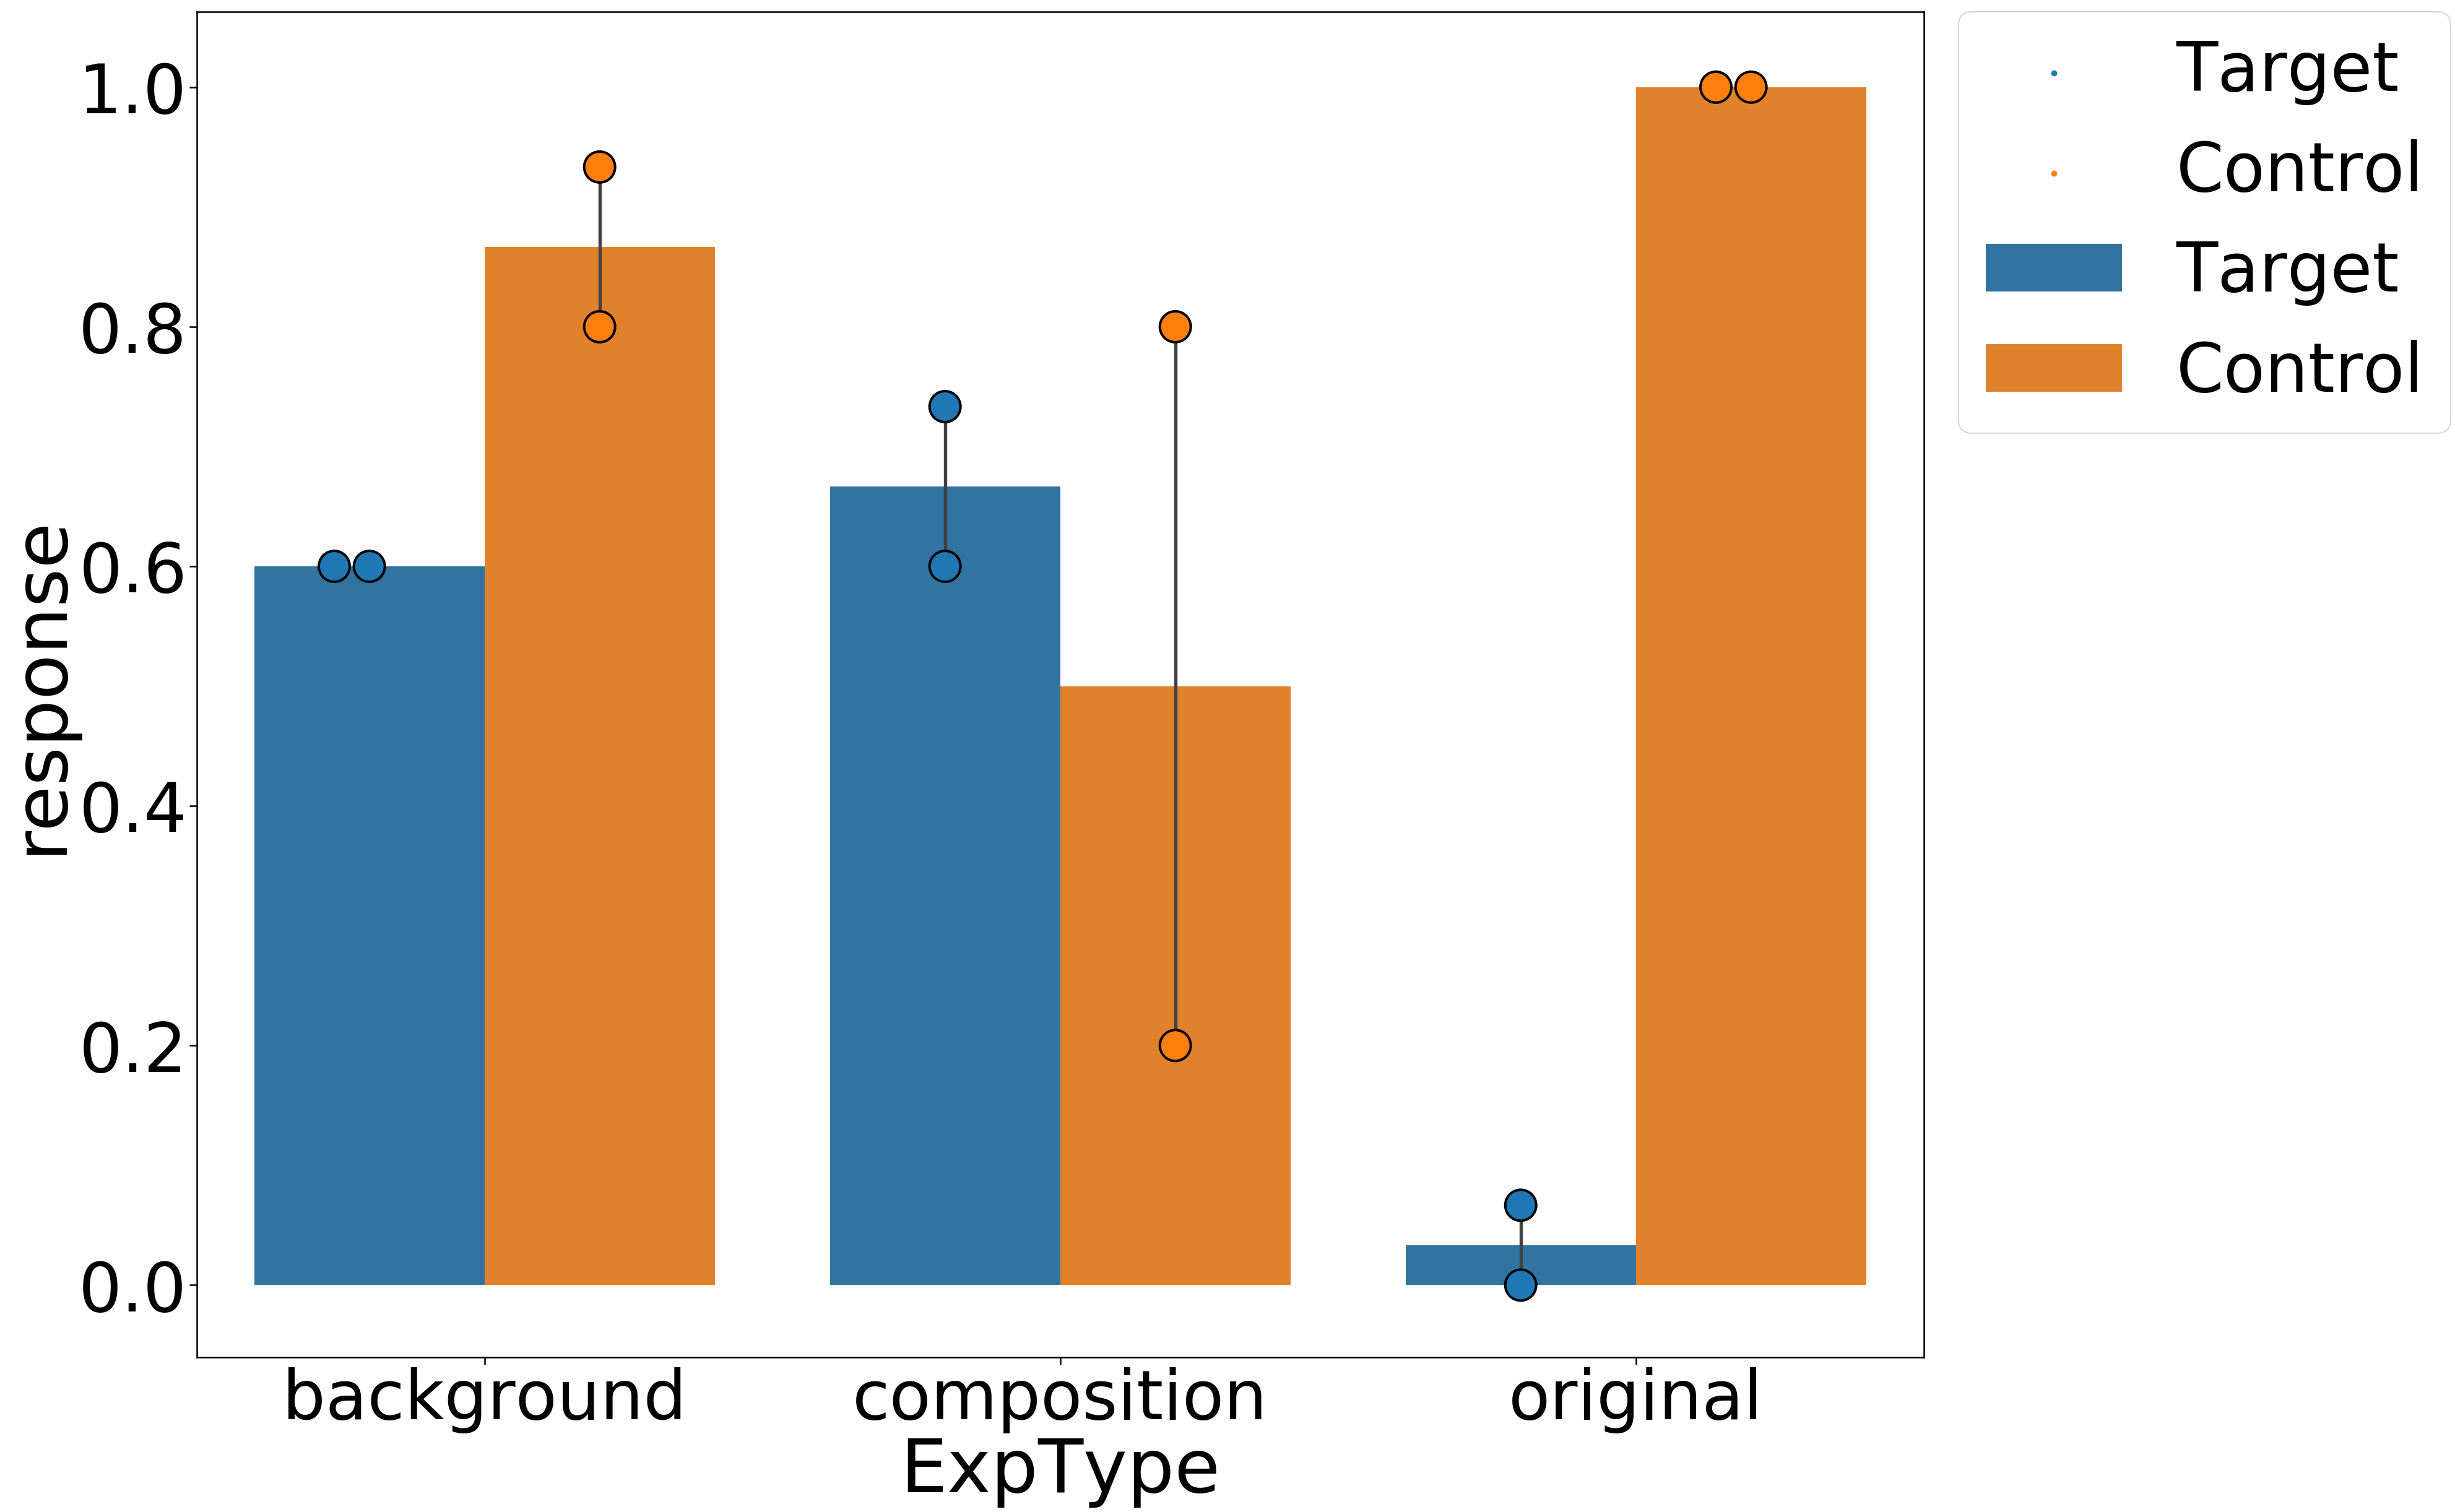

In [9]:
sns.set_context("poster", font_scale=5)
plt.subplots(figsize=(50, 40))

g = sns.swarmplot(x="ExpType", y="response", data=g_main, hue='Condition', split=True, size=50.0, edgecolor='black', linewidth=4);
g = sns.barplot(x='ExpType', y='response', data=g_main, hue='Condition' , ci=68)

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

